In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json

# read data.json
with open("data.json", "r") as f:
    Racing_data = json.load(f)


### find radius of curvature

Assume curve is a half circle with radius r

In [ ]:
"""
Distance of the corner: 310.98318296514117 m
Start of turn: 4840.210428145971
End of turn: 5151.193611111112
"""

start = 4840.210428145971
end = 5151.193611111112
distance = end - start
print(f"Distance of the corner: {distance} m")
radius = distance / np.pi
print(f"Radius of the corner: {radius} m")



Distance of the corner: 310.98318296514117 m
Radius of the corner: 98.98902157470704 m


### Find a function that returns the average velocity

Driver: VER
Lap: 49
Average velocity: 248.99 m/s
Lap: 50
Average velocity: 235.64 m/s
Lap: 51
Average velocity: 244.66 m/s
Lap: 52
Average velocity: 232.53 m/s
Driver: HUL
Lap: 49
Average velocity: 248.27 m/s
Lap: 50
Average velocity: 252.78 m/s
Lap: 51
Average velocity: 247.19 m/s
Lap: 52
Average velocity: 243.61 m/s
Driver: PIA
Lap: 49
Average velocity: 251.32 m/s
Lap: 50
Average velocity: 258.45 m/s
Lap: 51
Average velocity: 259.51 m/s
Lap: 52
Average velocity: 248.35 m/s
Driver: NOR
Lap: 49
Average velocity: 246.37 m/s
Lap: 50
Average velocity: 249.63 m/s
Lap: 51
Average velocity: 244.08 m/s
Lap: 52
Average velocity: 249.74 m/s
Driver: SAI
Lap: 49
Average velocity: 237.11 m/s
Lap: 50
Average velocity: 238.82 m/s
Lap: 51
Average velocity: 237.70 m/s
Lap: 52
Average velocity: 241.01 m/s
Driver: OCO
Lap: 49
Average velocity: 237.30 m/s
Lap: 50
Average velocity: 235.89 m/s
Lap: 51
Average velocity: 237.05 m/s
Lap: 52
Average velocity: 229.91 m/s
Driver: ALO
Lap: 49
Average velocity: 24

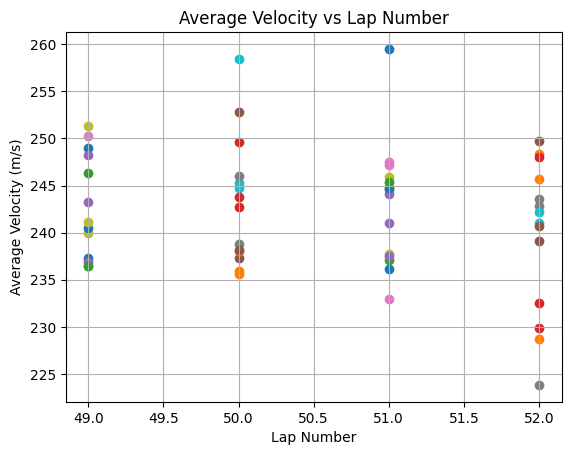

In [22]:
def average_velocity(data, start_of_corner = 4840.210, end_of_corner=5151.193):
    """
    Calculate the average velocity between two points in the data.
    
    Parameters:
    - data: list of dictionaries containing 'time' and 'speed'
    # - start: index of the starting point
    # - end: index of the ending point
    
    Returns:
    - Average velocity between start and end points
    """
    start_idx = np.where(np.array(data['distance']) >= start_of_corner)[0][0]
    end_idx = np.where(np.array(data['distance']) <= end_of_corner)[0][-1]
    
    velocities = np.array([data['speed'][i] for i in range(start_idx, end_idx + 1)])
    average_velocity = np.mean(velocities)
    return average_velocity



for driver in Racing_data.items():
    print(f"Driver: {driver[0]}")
    for lap in driver[1].items():
        print(f"Lap: {lap[0]}")
        avg_velocity = average_velocity(lap[1])
        print(f"Average velocity: {avg_velocity:.2f} m/s")
        # scatter plot the avg velocity vs lap number
        plt.scatter(int(lap[0]), avg_velocity, label=driver[0])
plt.xlabel("Lap Number")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity vs Lap Number")
# plt.legend()
plt.grid()
plt.show()

### equation 1 
$mv²/r = μ mg$

$μ = v²\frac{g}{r}$

### equation 2 
$mv²/r = μ(mg + C_D v²)$

$μ = mv²/(r(mg + C_D v²))$

Manual OLS result: μ = -0.417627 * lap + 81.508566


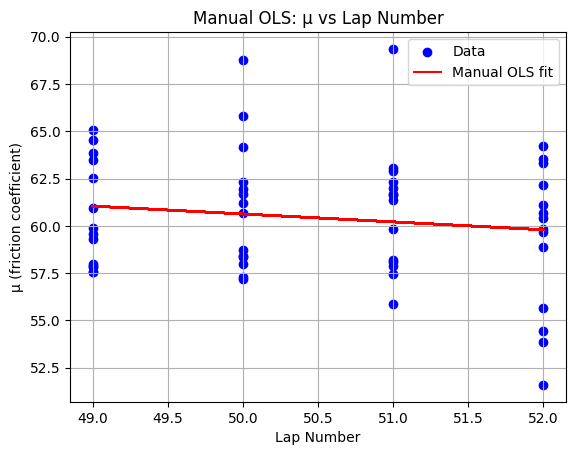

In [35]:
mass = 800  # kg
g = 9.81  # m/s^2


# Step 1: Collect data
lap_numbers = []
mus = []

g = 9.81
r = 50.0  # assumed or computed radius in meters

for driver, laps in Racing_data.items():
    for lap_num, lap_data in laps.items():
        v = average_velocity(lap_data)
        mu = v**2 / (radius * g)
        lap_numbers.append(int(lap_num))
        mus.append(mu)

# Convert to numpy arrays
x = np.array(lap_numbers)
y = np.array(mus)

# Step 2: Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Step 3: Compute slope (a) and intercept (b)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)

a = numerator / denominator
b = y_mean - a * x_mean

print(f"Manual OLS result: μ = {a:.6f} * lap + {b:.6f}")

# Step 4: Predict and plot
y_pred = a * x + b

plt.scatter(x, y, label="Data", color='blue')
plt.plot(x, y_pred, color='red', label="Manual OLS fit")
plt.xlabel("Lap Number")
plt.ylabel("μ (friction coefficient)")
plt.title("Manual OLS: μ vs Lap Number")
plt.legend()
plt.grid()
plt.show()



Manual OLS with downforce: μ = -0.000333 * lap + 1.631806


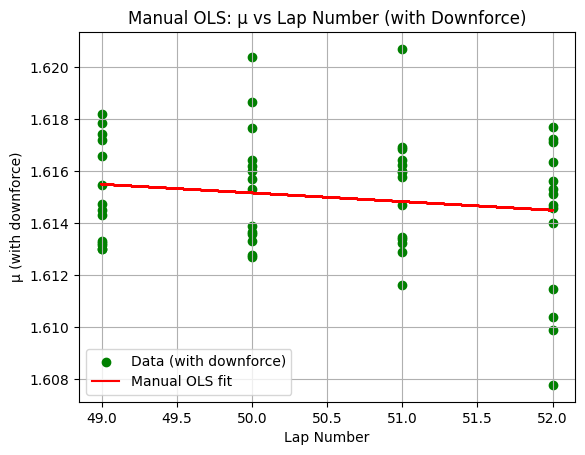

In [37]:

# Constants
g = 9.81              # gravity
m = 800.0             # mass of car in kg
C_D = 4.87             # downforce coefficient, conservative F1 value

lap_numbers = []
mu_with_downforce = []

for driver, laps in Racing_data.items():
    for lap_num, lap_data in laps.items():
        v = average_velocity(lap_data)
        numerator = m * v**2
        denominator = radius * (m * g + C_D * v**2)
        mu = numerator / denominator
        lap_numbers.append(int(lap_num))
        mu_with_downforce.append(mu)

# Convert to numpy arrays
x = np.array(lap_numbers)
y = np.array(mu_with_downforce)

# Manual OLS
x_mean = np.mean(x)
y_mean = np.mean(y)

a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b = y_mean - a * x_mean

print(f"Manual OLS with downforce: μ = {a:.6f} * lap + {b:.6f}")

# Predictions
y_pred = a * x + b

# Plotting
plt.scatter(x, y, label="Data (with downforce)", color='green')
plt.plot(x, y_pred, color='red', label="Manual OLS fit")
plt.xlabel("Lap Number")
plt.ylabel("μ (with downforce)")
plt.title("Manual OLS: μ vs Lap Number (with Downforce)")
plt.legend()
plt.grid()
plt.show()
